In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from info_apoio import best_corr
from info_apoio import drop_outlier
import seaborn as sns

# 1 - UNIÃO DOS DADOS

In [15]:
base_object = pd.read_csv("DADOS_TRATADOS\data_object_final.csv")
base_number = pd.read_csv("DADOS_TRATADOS\data_number_final.csv")

base = pd.merge(base_object, base_number, on='NU_INSCRICAO')
base.head(10)

,NU_INSCRICAO,TP_SEXO_F,TP_SEXO_M,TP_ESTADO_CIVIL_0,TP_ESTADO_CIVIL_1,TP_ESTADO_CIVIL_2,TP_ESTADO_CIVIL_3,TP_ESTADO_CIVIL_4,TP_COR_RACA_0,TP_COR_RACA_1,...,Q023_A,Q023_B,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,MEDIA
0,210053779631,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,582.06
1,210053840619,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,524.62
2,210053370322,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,643.86
3,210052219900,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,514.18
4,210052471228,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,566.96
5,210051544593,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,575.52
6,210053090262,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,586.18
7,210054429758,0,1,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,531.52
8,210054310301,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,522.92
9,210052456089,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,531.24


# 2 - CORRELAÇÃO EM RELAÇÃO A MÉDIA

In [16]:
base[best_corr(base, 'MEDIA', 15, 16)].corr()['MEDIA'] # a função best_corr retorna os m valores com maior correlação e 
                                                       # os n com menos correlação, em relação a um valor expecifico.
                                                       

MEDIA            1.000000
TP_ESCOLA_3      0.439468
Q018_B           0.286683
Q003_E           0.278160
Q001_G           0.252340
TP_COR_RACA_1    0.250390
Q004_E           0.243829
Q002_G           0.224422
Q008_E           0.224150
Q010_C           0.216993
Q024_D           0.210075
Q024_C           0.204061
Q021_B           0.203882
Q024_E           0.203325
Q014_B           0.202727
Q008_D           0.200367
Q006_C          -0.172578
Q001_B          -0.177830
Q004_B          -0.203007
Q021_A          -0.203882
Q016_A          -0.212257
Q014_A          -0.219368
Q013_A          -0.232738
Q006_B          -0.236987
Q010_A          -0.244492
Q019_B          -0.263136
Q007_A          -0.265947
Q018_A          -0.286683
Q024_A          -0.330502
Q008_B          -0.332424
TP_ESCOLA_2     -0.439468
Name: MEDIA, dtype: float64

# Questões Relevantes:

TP_ESCOLA_3 -> Privada\
TP_ESCOLA_2 -> Pública(*)

TP_COR_RACA_1 -> Branca

Q008_B -> Apenas 1 banheiro em casa.(*)\
Q008_D -> Três(3) ou mais banheiros em casa.\
Q008_E -> Quatro(4) ou mais banheiros em casa.


Q024_A -> Não tem computador em casa(*)\
Q024_C -> 2 computadores em casa()\
Q024_E -> Quatro ou mais computadores em casa()

# 3 - ANÁLISE GRAFICA

Text(0, 0.5, 'Quantidade')

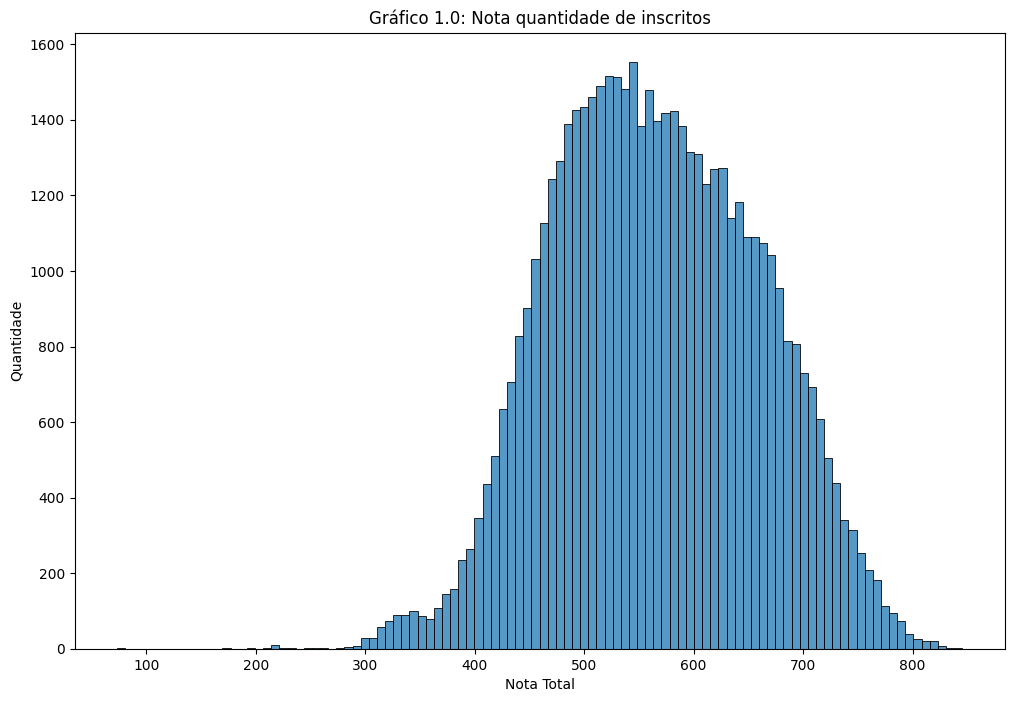

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(base, x = "MEDIA")
plt.title('Gráfico 1.0: Nota quantidade de inscritos')
plt.xlabel('Nota Total')
plt.ylabel('Quantidade')

In [18]:
base_grafica = pd.read_csv('analise_grafica.csv')
base_grafica.head(5)

,NU_INSCRICAO,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,Q001,Q002,Q003,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053779631,F,1,1,1,2,1.0,C,E,C,...,B,B,B,B,A,A,D,A,C,B
1,210053840619,F,1,1,1,2,1.0,C,E,B,...,A,A,A,B,A,A,E,A,B,B
2,210053370322,F,1,3,1,2,1.0,D,D,D,...,A,A,A,B,A,A,C,A,B,B
3,210052244535,M,1,3,1,2,1.0,C,E,C,...,B,A,A,C,A,A,D,A,C,B
4,210052219900,F,1,1,1,2,1.0,C,E,C,...,A,A,A,C,A,A,D,A,C,B


Text(0, 0.5, 'Quantidade')

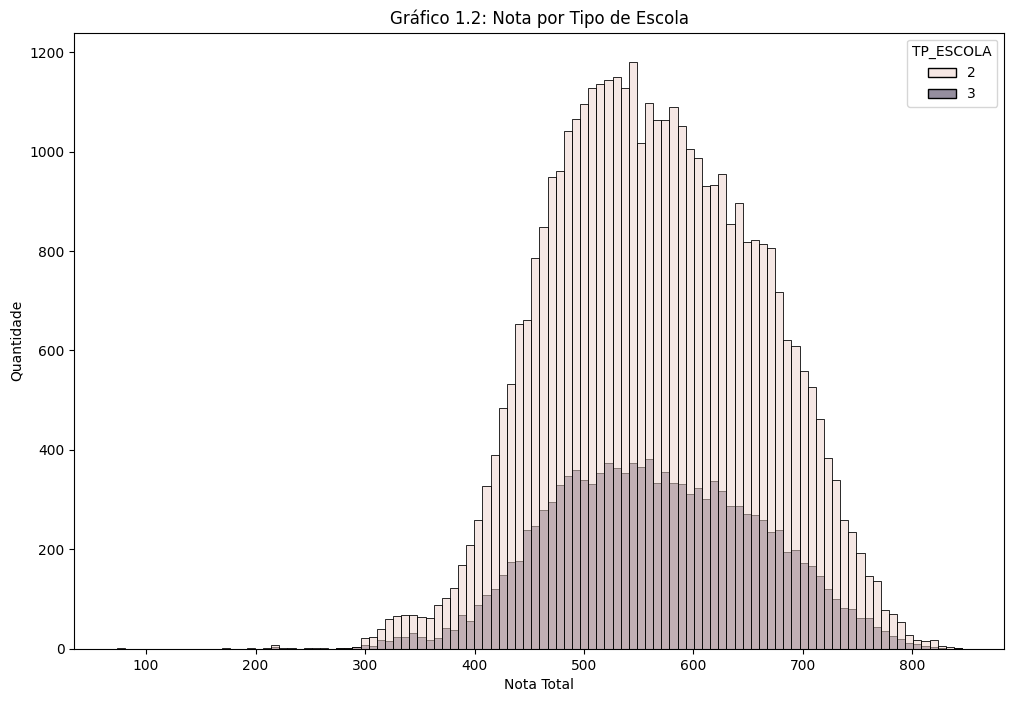

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(base, x = "MEDIA", hue=base_grafica['TP_ESCOLA'])
plt.title('Gráfico 1.2: Nota por Tipo de Escola')
plt.xlabel('Nota Total')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

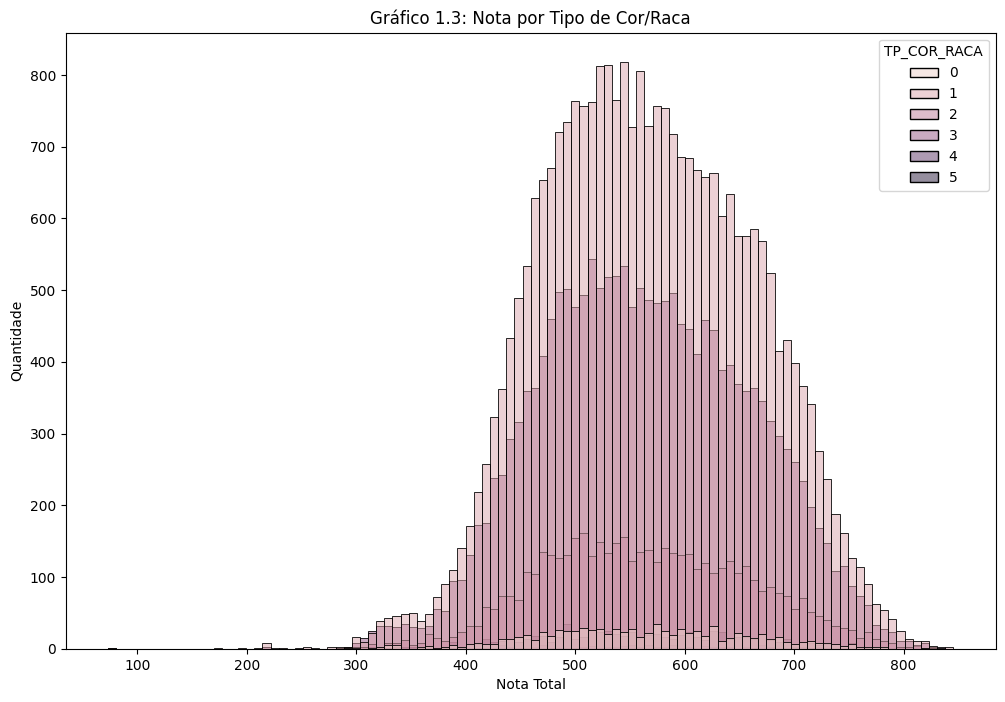

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(base, x = "MEDIA", hue=base_grafica['TP_COR_RACA'])
plt.title('Gráfico 1.3: Nota por Tipo de Cor/Raca')
plt.xlabel('Nota Total')
plt.ylabel('Quantidade')